# 🌳 Regression Trees

---

## 🎯 **What is it?**
A decision tree variant that predicts continuous numerical values instead of discrete classes. Each leaf node contains a predicted value (typically the mean of training samples in that leaf).

---

## ⚙️ **How it Works**

| Step | Process | Description |
|------|---------|-------------|
| 1️⃣ | **Root Node** | Start with entire dataset |
| 2️⃣ | **Best Split** | Find feature + threshold that minimizes error |
| 3️⃣ | **Recursive Split** | Repeat for each subset |
| 4️⃣ | **Leaf Prediction** | Assign mean/median of target values |
| 5️⃣ | **Prediction** | New sample follows path to leaf |

---

## 📊 **Key Differences from Classification Trees**

| Aspect | Classification Trees | Regression Trees |
|--------|---------------------|------------------|
| **Output** | Class labels | Continuous values |
| **Leaf Values** | Most frequent class | Mean/median of targets |
| **Splitting Criteria** | Gini, Entropy | MSE, MAE, Friedman MSE |
| **Evaluation** | Accuracy, F1-score | MSE, MAE, R² |

---

## 🔑 **Splitting Criteria**

### 📈 **Mean Squared Error (MSE)** - Default
> Measures average squared difference from mean

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2$$

**Split Quality:**
$$\text{MSE}_{\text{split}} = \frac{n_L}{n} \text{MSE}_L + \frac{n_R}{n} \text{MSE}_R$$

### 📉 **Mean Absolute Error (MAE)**
> Measures average absolute difference from median

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \text{median}(y)|$$

**When to use:** Robust to outliers

### 🎯 **Friedman MSE**
> MSE with improvement score for better splits

$$\text{Friedman MSE} = \text{MSE} + \alpha \times \text{improvement}$$

**When to use:** Better split selection, slightly slower

---

## 🔧 **Leaf Prediction Strategies**

| Method | Formula | Robust to Outliers? | Use Case |
|--------|---------|---------------------|----------|
| **Mean** | $\hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ | ❌ | Default, MSE criterion |
| **Median** | $\hat{y} = \text{median}(y_1, ..., y_n)$ | ✅ | MAE criterion, outliers |

---

## ✅ **Advantages**

```
✓ Handles non-linear relationships naturally
✓ No assumptions about data distribution
✓ Automatic feature selection through splits
✓ Easy to interpret and visualize
✓ Handles missing values well
✓ Can capture interactions between features
```

## ❌ **Disadvantages**

```
✗ High variance (unstable predictions)
✗ Prone to overfitting
✗ Biased toward features with more split points
✗ Poor performance on linear relationships
✗ Step-wise predictions (not smooth)
✗ Difficulty with extrapolation
```

---

## 🛠️ **Hyperparameters for Regression Trees**

### 🌳 **Structure Control**
| Parameter | Typical Values | Effect |
|-----------|----------------|--------|
| `max_depth` | 3-10 | Controls tree complexity |
| `min_samples_split` | 10-50 | Minimum samples to create split |
| `min_samples_leaf` | 5-20 | Minimum samples in leaf |

### 📏 **Quality Control**
| Parameter | Typical Values | Purpose |
|-----------|----------------|---------|
| `min_impurity_decrease` | 0.01-0.1 | Minimum error reduction for split |
| `max_features` | 'sqrt', 'log2' | Features considered per split |

---

## 📈 **Evaluation Metrics**

### 🎯 **Primary Metrics**

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

$$\text{RMSE} = \sqrt{\text{MSE}}$$

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|$$

$$\text{R}^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

---

## 🎪 **Use Cases**

- 🏠 **Real Estate**: House price prediction
- 📈 **Finance**: Stock price forecasting
- 🌡️ **Environmental**: Temperature/pollution modeling
- 🏥 **Healthcare**: Medical cost prediction
- 📊 **Business**: Sales forecasting

---

## 💻 **Implementation Example**

```python
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create regression tree
reg_tree = DecisionTreeRegressor(
    criterion='squared_error',  # MSE (default)
    max_depth=5,               # Prevent overfitting
    min_samples_split=20,      # Conservative splitting
    min_samples_leaf=10,       # Meaningful leaves
    random_state=42
)

# Fit and predict
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
```

---

## 🌟 **Advanced Techniques**

### 🌲 **Ensemble Methods**
- **Random Forest Regressor**: Multiple trees with random features
- **Gradient Boosting**: Sequential trees correcting errors
- **Extra Trees**: Extremely randomized trees

### 🎨 **Feature Engineering**
- **Binning**: Convert continuous features to categorical
- **Polynomial Features**: Capture more complex relationships
- **Target Encoding**: Use target statistics for categorical features

---

## 📋 **Best Practices**

| Practice | Why Important |
|----------|---------------|
| **Cross-validation** | Assess true performance |
| **Feature scaling** | Not required, but can help interpretation |
| **Outlier handling** | Use MAE criterion if outliers present |
| **Regularization** | Control tree complexity with hyperparameters |
| **Ensemble methods** | Reduce variance, improve stability |

---

> **💡 Pro Tip**: Single regression trees are rarely used alone. Consider Random Forest or Gradient Boosting for better performance and stability!

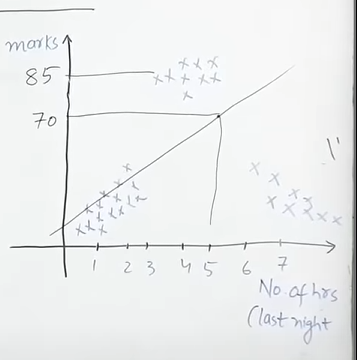

# 🌳 Regression Trees - Notes

## 📌 What is a Regression Tree?

A **Regression Tree** is a type of decision tree used when the **target variable is continuous**.

Unlike classification trees that predict class labels, regression trees **predict a real number output** by splitting the data into regions and assigning a prediction (usually the mean) for each region.

---

## 🧠 Core Idea

We split the feature space into **rectangular regions** and make predictions by calculating the **mean of the target values** in each region.

Example:

> If the tree splits the data into 4 regions:  
> $R_1$, $R_2$, $R_3$, $R_4$, then prediction in each region $R_j$ is:  
> $$ \hat{y}_{R_j} = \frac{1}{|R_j|} \sum_{x_i \in R_j} y_i $$

---

## ⚙️ How Does It Work?

1. **Start with all data**
2. At each step:
   - Choose the **feature** and **split point** that minimizes the **MSE**
3. **Repeat recursively** for left and right splits
4. **Stop** when:
   - Max depth reached
   - Minimum number of samples per node
   - No significant reduction in error

---

## 🎯 Splitting Criterion (MSE)

We choose the split that **minimizes Mean Squared Error (MSE)**:

Let a split divide data into $R_1$ and $R_2$, then:

$$
\text{MSE} = \sum_{x_i \in R_1} (y_i - \bar{y}_{R_1})^2 + \sum_{x_i \in R_2} (y_i - \bar{y}_{R_2})^2
$$

Where:
- $\bar{y}_{R_1}$ is mean of target values in region $R_1$
- $\bar{y}_{R_2}$ is mean of target values in region $R_2$

---

## 📉 Loss Function

- The loss used is typically the **Mean Squared Error (MSE)**:
  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- Tree tries to minimize this while growing.

---

## ✂️ Pruning

Pruning helps **avoid overfitting**:

### Types:
- **Pre-pruning**: Stop early using conditions (like max depth or min samples)
- **Post-pruning (Cost Complexity Pruning)**:
  
   Prune using a **complexity parameter $\alpha$**:

   $$
   C_\alpha(T) = \sum_{m=1}^{|T|} N_m \cdot \text{MSE}_m + \alpha |T|
   $$

   Where:
   - $T$ is the tree
   - $|T|$ is the number of leaves
   - $N_m$ is number of samples in node $m$

---

## 🛠 Example

Suppose we have the following dataset:

| Hours Studied (x) | Score (y) |
|-------------------|-----------|
| 1                 | 50        |
| 2                 | 55        |
| 3                 | 65        |
| 4                 | 70        |
| 5                 | 80        |

### Step 1:
Try all possible splits:

- Split at $x = 2.5$
  - Left: $(1,50), (2,55)$ → mean = 52.5
  - Right: $(3,65), (4,70), (5,80)$ → mean = 71.7

Compute total MSE for this split and compare with other splits. Choose the best.

Repeat recursively.

---

## ✅ Advantages

- Easy to interpret
- Can capture non-linear relationships
- No need for feature scaling
- Handles both numerical and categorical variables

---

## ❌ Disadvantages

- Can easily overfit
- Not smooth (prediction is constant in a region)
- Small changes in data can cause large changes in tree structure

---

## 🔄 Use in Ensembles

Regression trees are base models in:
- **Random Forest Regressors**
- **Gradient Boosted Trees (XGBoost, LightGBM)**

These improve accuracy and reduce overfitting.

---

## 📌 Summary

| Concept         | Explanation |
|----------------|-------------|
| Type            | Non-parametric, tree-based |
| Output          | Continuous values |
| Splitting       | Minimizes MSE |
| Prediction Rule | Mean of region |
| Pruning         | Pre or Post (Cost-complexity) |
| Risk            | Overfitting (especially deep trees) |
| Fix             | Pruning or Ensembles |

---



In [2]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV

In [7]:
# Load the California housing dataset
housing = fetch_california_housing()

# Create a DataFrame for the features
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add the target variable (median house value) to the DataFrame
df['MedHouseVal'] = housing.target

In [9]:
df.shape

(20640, 9)

In [8]:
df.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18513,4.0417,47.0,5.341880,1.064103,607.0,2.594017,36.98,-122.01,2.653
2545,1.6369,39.0,4.911315,1.009174,731.0,2.235474,40.78,-124.17,0.683
8030,3.5465,35.0,4.482861,1.004471,1584.0,2.360656,33.84,-118.13,2.132


In [10]:
X=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [13]:
rt=DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [14]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [15]:
y_pred = rt.predict(X_test)

In [16]:
r2_score(y_test,y_pred)

0.5997321244428706

### Hyperparameter Tuning

In [20]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [23]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,n_jobs=-1)

In [ ]:
reg.fit(X_train,y_train)